In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr
import seaborn as sns
import geobr
sns.set(style="white")

In [2]:
sys.path.append('..')

In [3]:
df = pd.read_csv('../Data/processed/pertussis_total.csv', 
                delimiter = ',',
                index_col=False,
                parse_dates = ['DT_SIN_PRI','DT_NOTIFIC'], encoding="utf8")

C:\Users\denis\AppData\Local\Temp\ipykernel_10612\3505764348.py:1: DtypeWarning: Columns (9,15,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/processed/pertussis_total.csv',


In [4]:
mun_path = '../Data/municipalities.csv'
mun_file = pd.read_csv(mun_path)
mun_file['codigo'] = mun_file['municipio'].astype(str).str[:6].astype(int)
mun_file = mun_file[['municipio','name','codigo','pop_21']]

### Getting outbreak size for year-municipality + population size

In [29]:
df_casos = df.copy()
df_casos['CASO'] = 1
df_casos = df_casos.groupby(['SIN_YEAR','ID_MUNICIP'])['CASO'].sum()
df_casos = df_casos.reset_index(name = 'CASOS')

In [30]:
mun_file

,municipio,name,codigo,pop_21
0,1100015,Alta Floresta d'Oeste,110001,22516
1,1100023,Ariquemes,110002,111148
2,1100031,Cabixi,110003,5067
3,1100049,Cacoal,110004,86416
4,1100056,Cerejeiras,110005,16088
...,...,...,...,...
5565,5222005,Vianópolis,522200,14088
5566,5222054,Vicentinópolis,522205,9002
5567,5222203,Vila Boa,522220,6451
5568,5222302,Vila Propício,522230,5941


In [31]:
df_casos = df_casos.merge(mun_file,how = 'left', left_on = 'ID_MUNICIP', right_on = 'codigo')

In [32]:
df_casos

,SIN_YEAR,ID_MUNICIP,CASOS,municipio,name,codigo,pop_21
0,2007,110034,1,1100346,Alvorada d'Oeste,110034,13807
1,2007,130250,1,1302504,Manacapuru,130250,99613
2,2007,130260,42,1302603,Manaus,130260,2255903
3,2007,140010,2,1400100,Boa Vista,140010,436591
4,2007,150140,5,1501402,Belém,150140,1506420
...,...,...,...,...,...,...,...
6138,2022,510325,1,5103254,Colniza,510325,41117
6139,2022,510340,2,5103403,Cuiabá,510340,623614
6140,2022,510677,1,5106778,Porto Alegre do Norte,510677,12849
6141,2022,520870,3,5208707,Goiânia,520870,1555626


In [33]:
df_casos = df_casos[['SIN_YEAR','ID_MUNICIP','CASOS','pop_21']]

In [35]:
df_casos['CASOS_N'] = df_casos['CASOS']/df_casos['pop_21']

C:\Users\denis\AppData\Local\Temp\ipykernel_10612\4139271754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casos['CASOS_N'] = df_casos['CASOS']/df_casos['pop_21']


### Classification of cities and histograms

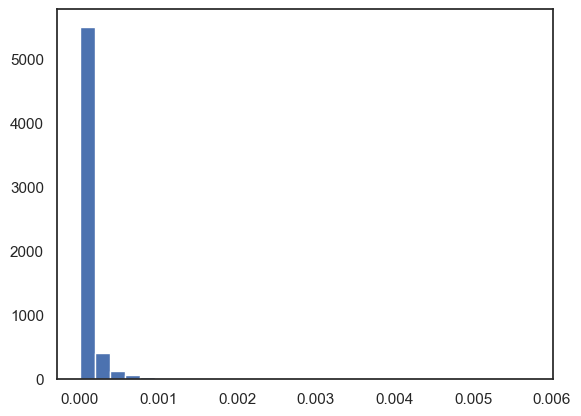

In [59]:
plt.hist(df_casos['CASOS_N'], bins = 30)
plt.show()

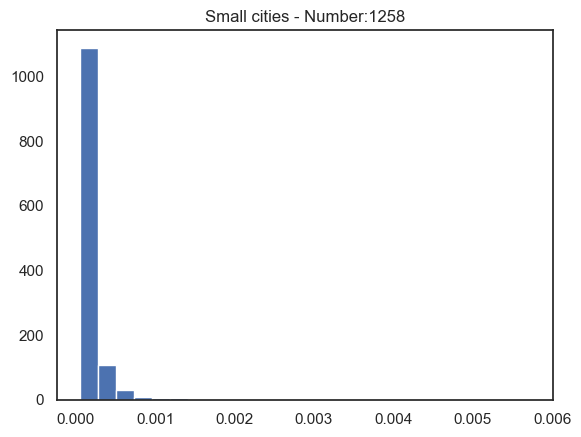

In [60]:
df_small = df_casos[df_casos['pop_21'] >= 5000]
df_small = df_small[df_small['pop_21']<=20000]
plt.title('Small cities - Number:'+str(df_small.shape[0]))
plt.hist(df_small['CASOS_N'], bins = 25)
plt.show()

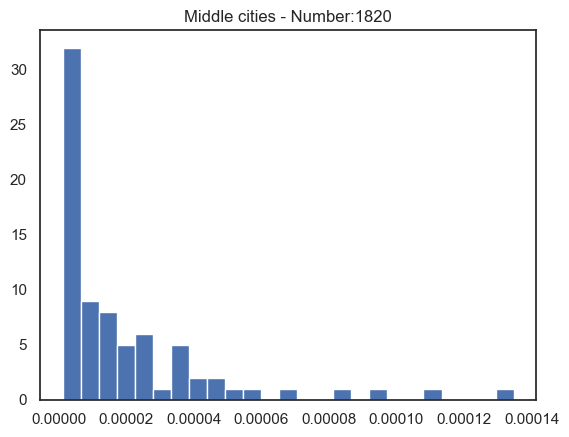

In [61]:
df_middle = df_casos[df_casos['pop_21'] >= 50000]
df_middle = df_middle[df_middle['pop_21']<=200000]
plt.title('Middle cities - Number:'+str(df_middle.shape[0]))
plt.hist(df_big['CASOS_N'], bins = 25)
plt.show()

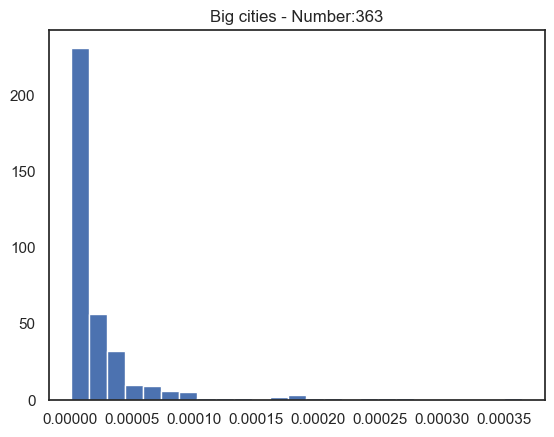

In [62]:
df_big = df_casos[df_casos['pop_21'] >= 500000]
df_big = df_big[df_big['pop_21']<=1000000]
plt.title('Big cities - Number:'+str(df_big.shape[0]))
plt.hist(df_big['CASOS_N'], bins = 25)
plt.show()

### Filtering for the state of SP

In [63]:
df_casos['state'] = df_casos['ID_MUNICIP'].astype(str).str[0:2].astype(int)
df_casos_sp = df_casos[df_casos['state'] == 35]

C:\Users\denis\AppData\Local\Temp\ipykernel_10612\1903542186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casos['state'] = df_casos['ID_MUNICIP'].astype(str).str[0:2].astype(int)


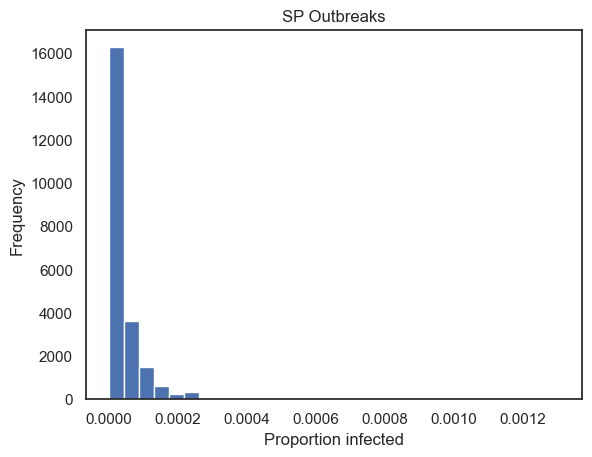

In [71]:
plt.hist(df_casos_sp['CASOS_N'], bins = 30, density = True)
plt.ylabel('Frequency')
plt.xlabel('Proportion infected')
plt.title('SP Outbreaks')
plt.show()

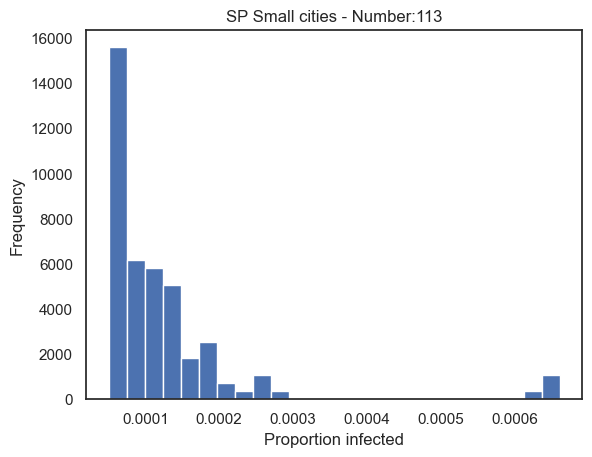

In [74]:
df_small = df_casos_sp[df_casos_sp['pop_21'] >= 5000]
df_small = df_small[df_small['pop_21']<=20000]
plt.title('SP Small cities - Number:'+str(df_small.shape[0]))
plt.ylabel('Frequency')
plt.xlabel('Proportion infected')
plt.hist(df_small['CASOS_N'], bins = 25, density = True)
plt.show()

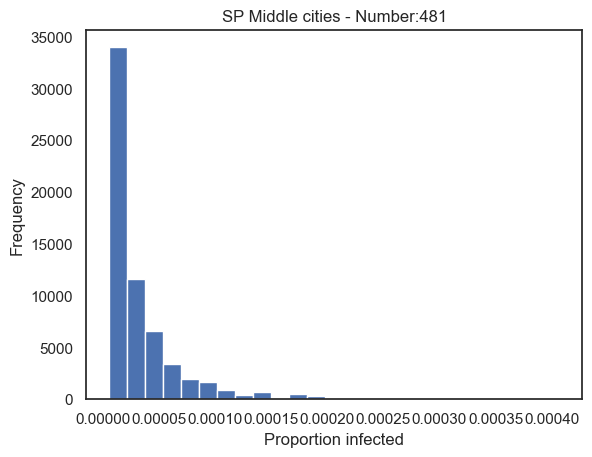

In [75]:
df_middle = df_casos_sp[df_casos_sp['pop_21'] >= 50000]
df_middle = df_middle[df_middle['pop_21']<=200000]
plt.title('SP Middle cities - Number:'+str(df_middle.shape[0]))
plt.hist(df_middle['CASOS_N'], bins = 25, density = True)
plt.ylabel('Frequency')
plt.xlabel('Proportion infected')
plt.show()

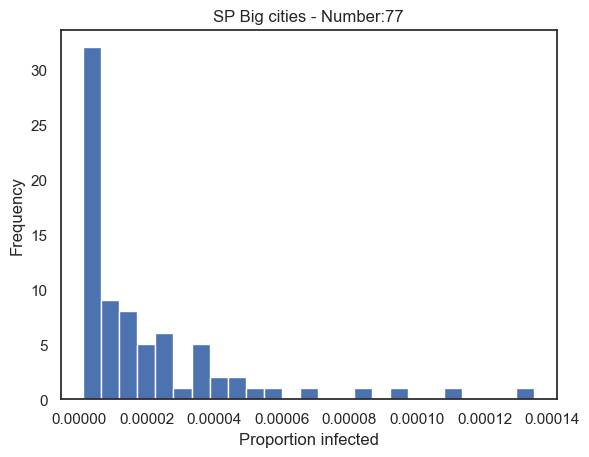

In [76]:
df_big = df_casos_sp[df_casos_sp['pop_21'] >= 500000]
df_big = df_big[df_big['pop_21']<=1000000]
plt.title('SP Big cities - Number:'+str(df_big.shape[0]))
plt.hist(df_big['CASOS_N'], bins = 25)
plt.ylabel('Frequency')
plt.xlabel('Proportion infected')
plt.show()